In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

## Top 5 rows

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Last 5 rows


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## Shape of Data

In [6]:
data.shape

(200, 5)

## Infomation of Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Check null value

In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Get overall statistics

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## K_means clustering

In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
X = data.iloc[:,[3,4]]

In [19]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [20]:
from sklearn.cluster import KMeans

In [23]:
k_means = KMeans()
k_means.fit(X)

KMeans()

In [24]:
k_means.fit_predict(X)

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 5, 7, 5, 3, 5, 3, 5,
       7, 5, 3, 5, 3, 5, 3, 5, 3, 5, 7, 5, 3, 5, 7, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 7, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

## Elbow method

In [28]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37442.24745037571,
 30241.34361793659,
 25095.703209997544,
 21794.885609098194,
 19641.456216651564]

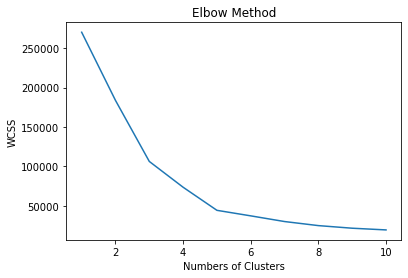

In [33]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

## Model Training

In [35]:
X = data.iloc[:,[3,4]]

In [38]:
k_means = KMeans(n_clusters = 5, random_state = 42)
y_means = k_means.fit_predict(X)

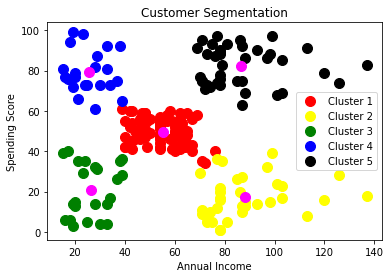

In [41]:
plt.scatter(X.iloc[y_means == 0,0], X.iloc[y_means == 0,1], s=100,c='red', label='Cluster 1')
plt.scatter(X.iloc[y_means == 1,0], X.iloc[y_means == 1,1], s=100,c='yellow', label='Cluster 2')
plt.scatter(X.iloc[y_means == 2,0], X.iloc[y_means == 2,1], s=100,c='green', label='Cluster 3')
plt.scatter(X.iloc[y_means == 3,0], X.iloc[y_means == 3,1], s=100,c='blue', label='Cluster 4')
plt.scatter(X.iloc[y_means == 4,0], X.iloc[y_means == 4,1], s=100,c='black', label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s =100, c='magenta')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## Save the model

In [44]:
import joblib

In [45]:
joblib.dump(k_means, 'customer_segmentation')

['customer_segmentation']

In [46]:
model = joblib.load('customer_segmentation')

## GUI

In [48]:
from tkinter import *

In [55]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    
    model = joblib.load('customer_segmentation')
    result = model.predict([[p1,p2]])
    print('This customer belongs to cluster no: ', result[0])
    
    if result[0] == 0:
        Label(master, text = "Customers with medium annual income and medium spending score").grid(row=4)
    elif result[0] == 1:
        Label(master, text = "Customers with high annual income and low spending score").grid(row=4)
    elif result[0] == 2:
        Label(master, text = "Customers with low annual income and low spending score").grid(row=4)
    elif result[0] == 3:
        Label(master, text = "Customers with low annual income and high spending score").grid(row=4)
    elif result[0] == 4:
        Label(master, text = "Customers with high annual income and high spending score").grid(row=4)
        
master = Tk()
master.title('Customer Segmentation Using ML')

label = Label(master, text='Customer Segmentation Using ML', bg="black", fg='White').grid(row=0,columnspan = 2)
label = Label(master, text='Annual Income').grid(row=1)
label = Label(master, text='Spending Score').grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='Predict', command = show_entry_fields).grid()

mainloop()

This customer belongs to cluster no:  4
